A German car company wants to enter the US Market by setting up their manufacturing unit there 
and producing cars locally to give competition to their US and European counterparts. They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the German market.




In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading csv file
car = pd.read_csv('Cars.csv')

In [5]:
#checking the dataset details
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#checking for missing values
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### There are no null

In [10]:
# Making a list of unique Car Names
ar = car['CarName'].unique()
lst = ar.tolist()

In [8]:
len(lst)

147

### Extracting the Car Company names from The Car names

In [11]:
comp_name = car['CarName'].str.split(' ',n=1,expand=True)

In [12]:
comp_name

,0,1
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
...,...,...
200,volvo,145e (sw)
201,volvo,144ea
202,volvo,244dl
203,volvo,246


In [13]:
## Taking only the company names
comp_name = comp_name[0]

In [14]:
car['Car_Company'] = comp_name

In [15]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [16]:
# Dropping CarName since it is no longer necessary
car.drop(columns = 'CarName', inplace=True)

## Fixing some errors in Car Company names

In [17]:
### Some companies have errors in names leading to duplicate instances
car['Car_Company'] = car['Car_Company'].str.replace('Nissan','nissan',case=False)
car['Car_Company'] = car['Car_Company'].str.replace('maxda','mazda',case=False)
car['Car_Company'] = car['Car_Company'].str.replace('porcshce','porsche',case=False)
car['Car_Company'] = car['Car_Company'].str.replace('toyouta','toyota',case=False)
car['Car_Company'] = car['Car_Company'].str.replace('vokswagen','volkswagen',case=False)
car['Car_Company'] = car['Car_Company'].str.replace('vw','volkswagen',case=False)

##### Assigning the numeric variables to the list num_var

In [18]:
num_var = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

## Now Visualising the data with matplotlib & seaborn.

### Correlation Check

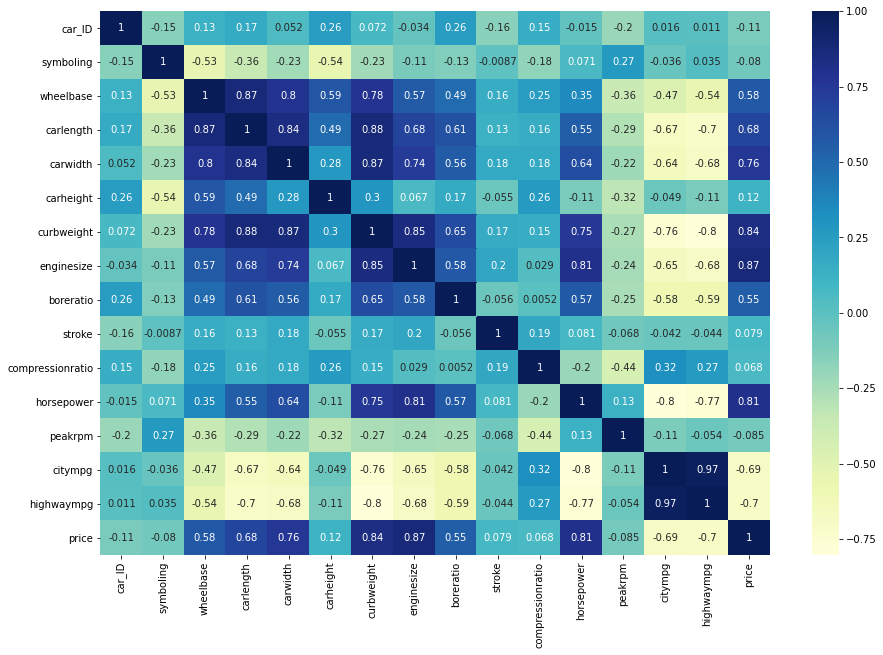

In [19]:
plt.figure(figsize = (15, 10))
sns.heatmap(car.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### A few attributes have correlation

### Checking for outliers using boxplot

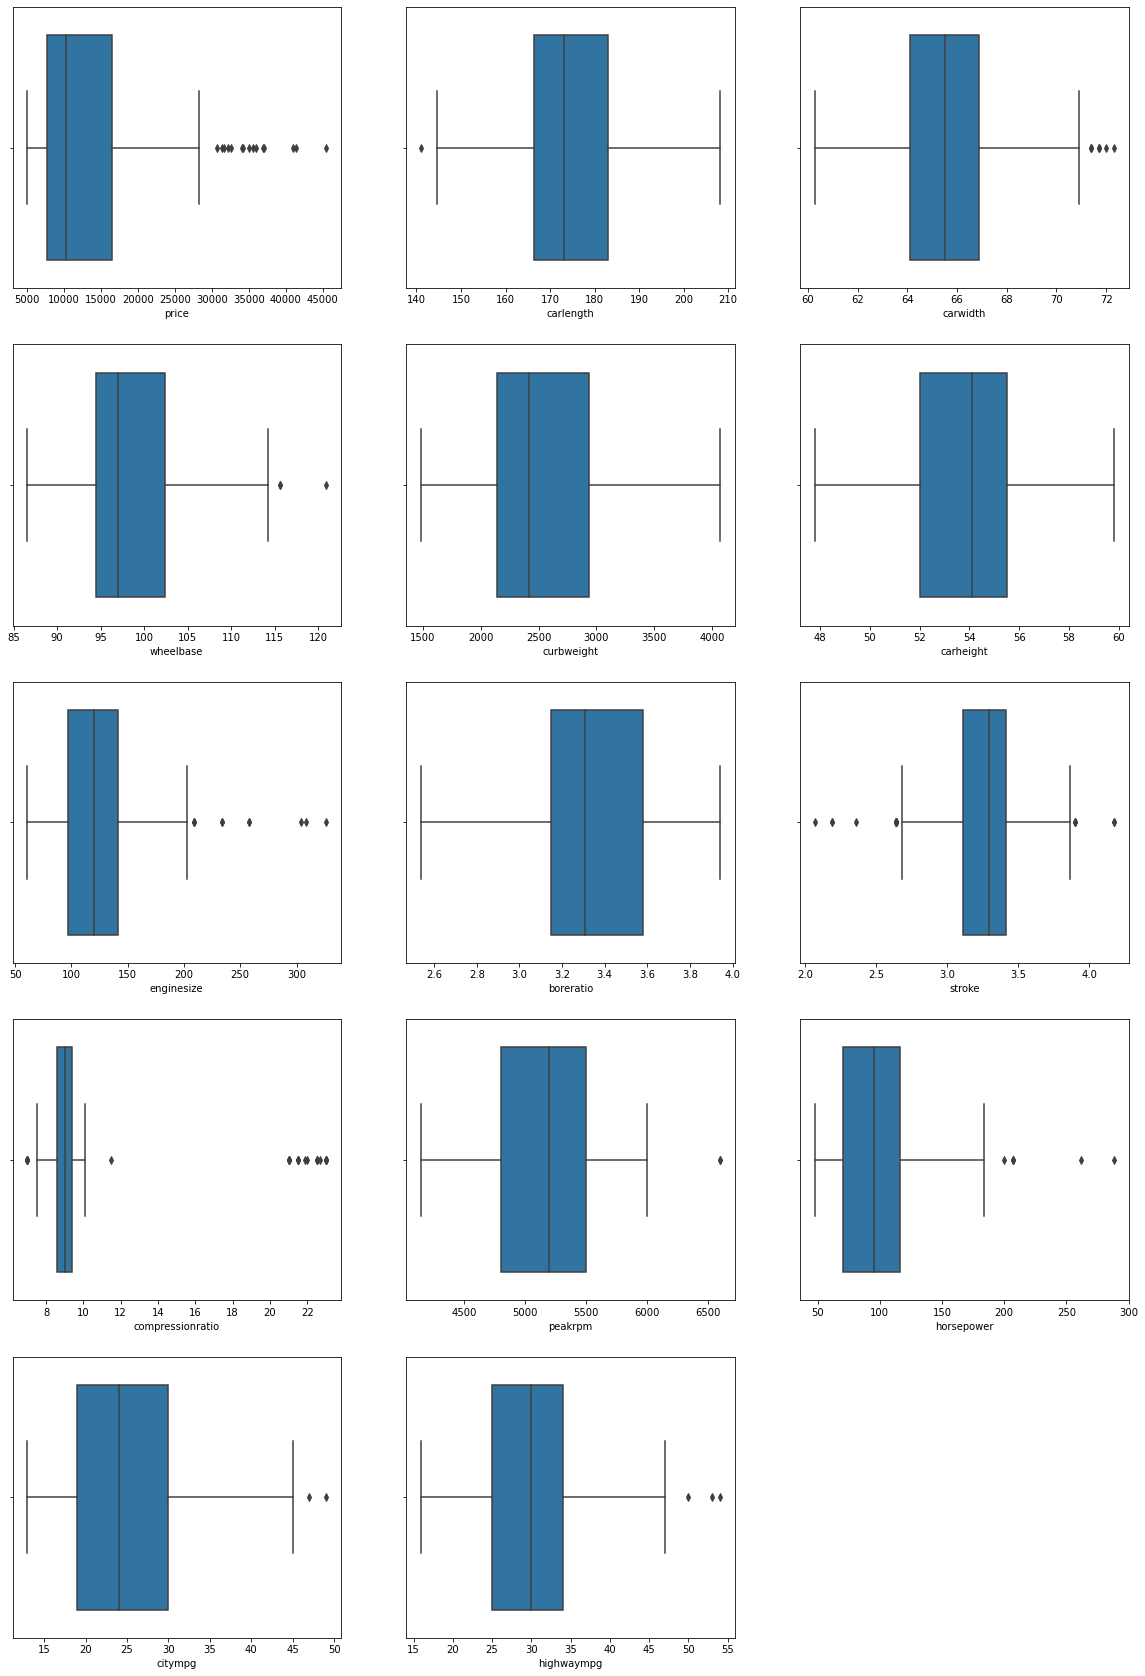

In [20]:
plt.figure(figsize=(20, 30))
plt.subplot(5,3,1)
sns.boxplot(car.price)
plt.subplot(5,3,2)
sns.boxplot(car.carlength)
plt.subplot(5,3,3)
sns.boxplot(car.carwidth)
plt.subplot(5,3,4)
sns.boxplot(car.wheelbase)
plt.subplot(5,3,5)
sns.boxplot(car.curbweight)
plt.subplot(5,3,6)
sns.boxplot(car.carheight)
plt.subplot(5,3,7)
sns.boxplot(car.enginesize)
plt.subplot(5,3,8)
sns.boxplot(car.boreratio)
plt.subplot(5,3,9)
sns.boxplot(car.stroke)
plt.subplot(5,3,10)
sns.boxplot(car.compressionratio)
plt.subplot(5,3,11)
sns.boxplot(car.peakrpm)
plt.subplot(5,3,12)
sns.boxplot(car.horsepower)
plt.subplot(5,3,13)
sns.boxplot(car.citympg)
plt.subplot(5,3,14)
sns.boxplot(car.highwaympg)

## There are some outliers. The data is very limited and we donot want to loose any car company from analysis, we refrain from treating the data with outliers.

#### Checking for relationships between variables using scatter plots

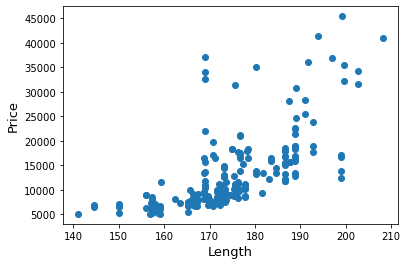

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = car['carlength'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Length', fontsize=13)
plt.show()

In [22]:
### Car price increases with length

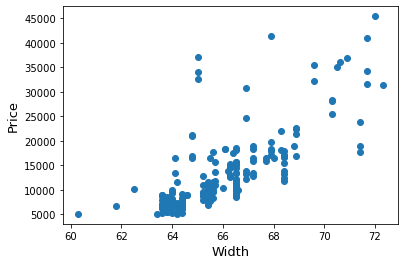

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = car['carwidth'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Width', fontsize=13)
plt.show()

In [24]:
### We can see that the car price more or less increases with the car width

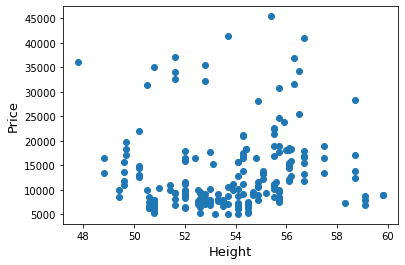

In [25]:
fig, ax = plt.subplots()
ax.scatter(x = car['carheight'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Height', fontsize=13)
plt.show()

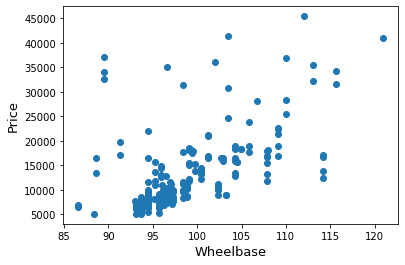

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = car['wheelbase'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Wheelbase', fontsize=13)
plt.show()

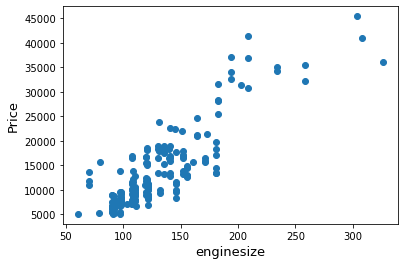

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = car['enginesize'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('enginesize', fontsize=13)
plt.show()

In [28]:
#### Enginesize is positively correlated with price

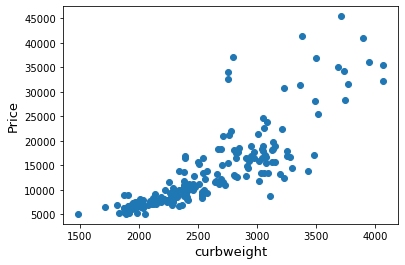

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = car['curbweight'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('curbweight', fontsize=13)
plt.show()

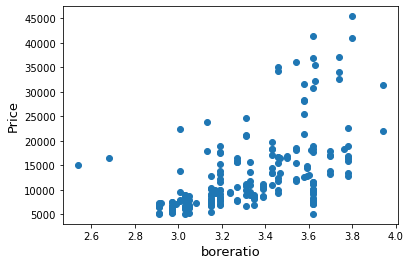

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = car['boreratio'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('boreratio', fontsize=13)
plt.show()

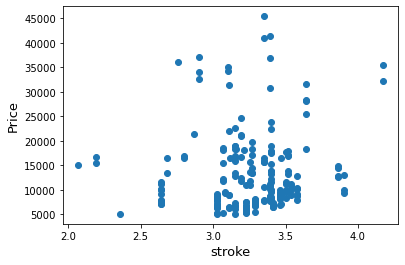

In [31]:
fig, ax = plt.subplots()
ax.scatter(x = car['stroke'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('stroke', fontsize=13)
plt.show()

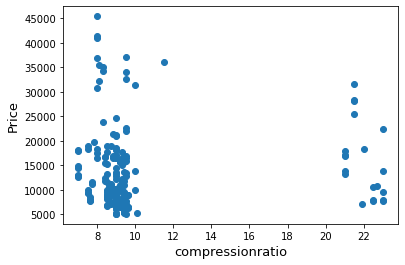

In [32]:
fig, ax = plt.subplots()
ax.scatter(x = car['compressionratio'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('compressionratio', fontsize=13)
plt.show()

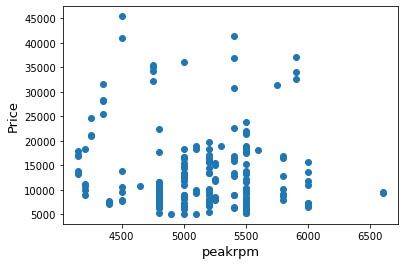

In [33]:
fig, ax = plt.subplots()
ax.scatter(x = car['peakrpm'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('peakrpm', fontsize=13)
plt.show()

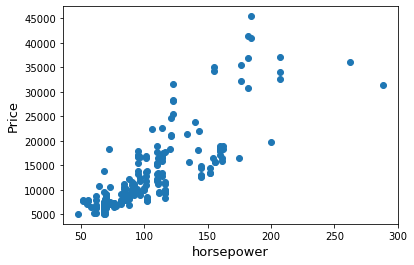

In [34]:
fig, ax = plt.subplots()
ax.scatter(x = car['horsepower'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('horsepower', fontsize=13)
plt.show()

In [35]:
#### price increases with horsepower

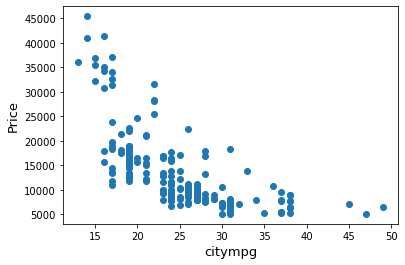

In [36]:
fig, ax = plt.subplots()
ax.scatter(x = car['citympg'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('citympg', fontsize=13)
plt.show()

In [37]:
### Price decreases with increase in citympg. Luxury cars have low citympg.

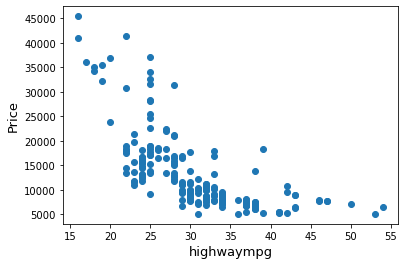

In [38]:
fig, ax = plt.subplots()
ax.scatter(x = car['highwaympg'], y = car['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('highwaympg', fontsize=13)
plt.show()

In [39]:
### Price decreases with increase in highwaympg. Luxury cars have low highwaympg.

## Binary Encoding

In [40]:
varlist =  ['fueltype', 'aspiration', 'doornumber', 'enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({'gas': 1, "diesel": 0,"std":1,"turbo":0,"four":1,"two":0,"front":0,"rear":1,})

# Applying the function to the housing list
car[varlist] = car[varlist].apply(binary_map)

## Dummy Encoding

##### Assigning the catergorical variables to the list cat_var

In [41]:
cat_var = ['carbody','drivewheel','Car_Company','enginetype','cylindernumber','fuelsystem']

In [42]:
for item in cat_var:
    body = pd.get_dummies(car[item],prefix = item, drop_first = True)
    car = pd.concat([car,body], axis=1)
    car.drop(item, axis=1, inplace=True)

In [43]:
car.shape

(205, 66)

In [44]:
# Dropping car_ID since it is not necessary
car.drop('car_ID',axis=1,inplace=True)

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
num_var.append('enginesize')

### Standardizing the numeric variables

In [49]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [50]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.170159,1,1,1,0,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,...,0,0,0,1,0,0,0,0,0,0
125,1.848278,1,1,0,0,-0.677177,-0.359789,1.114978,-1.382026,0.439415,...,0,0,0,0,0,0,0,1,0,0
166,0.170159,1,1,0,0,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,1,1,0,0,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,...,0,0,0,0,0,0,0,1,0,0
199,-1.507960,1,0,1,0,0.972390,1.225364,0.616439,1.627983,1.137720,...,0,0,0,0,0,0,0,1,0,0


## # Dividing into X and Y sets for model building

In [51]:
y_train = df_train.pop('price')
X_train = df_train

# Using RFE approach

In [54]:
### We will use Recursive Feature Elimination for dimentionality reduction

In [55]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Output number of variables is 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [57]:
### checking the selected attributes
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'enginelocation', 'enginesize', 'boreratio',
       'Car_Company_audi', 'Car_Company_bmw', 'Car_Company_buick',
       'Car_Company_mitsubishi', 'Car_Company_porsche', 'Car_Company_saab',
       'Car_Company_volvo', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

# Using statsmodel api

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
# Adding constant
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Model 1

In [60]:
#Running linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     90.21
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           8.66e-63
Time:                        16:11:56   Log-Likelihood:                -9.5973
No. Observations:                 143   AIC:                             59.19
Df Residuals:                     123   BIC:                             118.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [61]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,cylindernumber_two,inf
15,enginetype_rotor,inf
0,const,77.91
3,enginesize,24.10
17,cylindernumber_four,15.27
4,boreratio,10.07
16,cylindernumber_five,6.52
9,Car_Company_porsche,3.56
14,enginetype_ohcf,3.39
5,Car_Company_audi,3.37


In [62]:
#Dropping enginelocation
X_train_new = X_train_rfe.drop(["enginelocation"], axis = 1)

### Model 2

In [63]:
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     95.23
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.37e-63
Time:                        16:14:03   Log-Likelihood:                -10.130
No. Observations:                 143   AIC:                             58.26
Df Residuals:                     124   BIC:                             114.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [64]:
# Dropping enginetype_dohcv
X_train_new1 = X_train_new.drop('enginetype_dohcv',axis=1)

## Model 3

In [65]:
lm = sm.OLS(y_train,X_train_new1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     101.1
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.85e-64
Time:                        16:14:13   Log-Likelihood:                -10.500
No. Observations:                 143   AIC:                             57.00
Df Residuals:                     125   BIC:                             110.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [66]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,cylindernumber_two,inf
13,enginetype_rotor,inf
0,const,71.66
2,enginesize,21.82
15,cylindernumber_four,14.17
3,boreratio,8.62
14,cylindernumber_five,6.27
4,Car_Company_audi,3.35
12,enginetype_ohcf,2.70
6,Car_Company_buick,2.40


In [67]:
# Dropping enginetype_rotor
X_train_new2 = X_train_new1.drop('enginetype_rotor',axis=1)

## Model 4

In [68]:
lm = sm.OLS(y_train,X_train_new2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     101.1
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.85e-64
Time:                        16:15:23   Log-Likelihood:                -10.500
No. Observations:                 143   AIC:                             57.00
Df Residuals:                     125   BIC:                             110.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [69]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.66
2,enginesize,21.82
14,cylindernumber_four,14.17
3,boreratio,8.62
13,cylindernumber_five,6.27
17,cylindernumber_two,5.98
4,Car_Company_audi,3.35
12,enginetype_ohcf,2.70
6,Car_Company_buick,2.40
16,cylindernumber_twelve,2.40


In [70]:
X_train_new3 = X_train_new2.drop('const',axis=1)

## Model 5

In [71]:
#M5
lm = sm.OLS(y_train,X_train_new3).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              93.58
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    7.08e-63
Time:                        16:15:48   Log-Likelihood:                         -16.154
No. Observations:                 143   AIC:                                      66.31
Df Residuals:                     126   BIC:                                      116.7
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [72]:
#Dropping cylindernumber_five
X_train_new4 = X_train_new3.drop('cylindernumber_five',axis=1)

## Model 6

In [73]:
lm = sm.OLS(y_train,X_train_new4).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              100.2
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    7.10e-64
Time:                        16:15:59   Log-Likelihood:                         -16.178
No. Observations:                 143   AIC:                                      64.36
Df Residuals:                     127   BIC:                                      111.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [74]:
#Dropping cylindernumber_three
X_train_new5 = X_train_new4.drop('cylindernumber_three',axis=1)

## Model 7

In [75]:
lm = sm.OLS(y_train,X_train_new5).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              107.0
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    1.01e-64
Time:                        16:16:29   Log-Likelihood:                         -16.636
No. Observations:                 143   AIC:                                      63.27
Df Residuals:                     128   BIC:                                      107.7
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [76]:
# Dropping cylindernumber_four
X_train_new6 = X_train_new5.drop('cylindernumber_four',axis=1)

## Model 8

In [77]:
lm = sm.OLS(y_train,X_train_new6).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              113.6
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    2.47e-65
Time:                        16:16:50   Log-Likelihood:                         -17.739
No. Observations:                 143   AIC:                                      63.48
Df Residuals:                     129   BIC:                                      105.0
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [78]:
# Dropping enginetype_ohcf
X_train_new7 = X_train_new6.drop('enginetype_ohcf',axis=1)

## Model 9

In [79]:
lm = sm.OLS(y_train,X_train_new7).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              121.0
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    6.64e-66
Time:                        16:17:01   Log-Likelihood:                         -18.976
No. Observations:                 143   AIC:                                      63.95
Df Residuals:                     130   BIC:                                      102.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [80]:
# Dropping cylindernumber_twelve
X_train_new8 = X_train_new7.drop('cylindernumber_twelve',axis=1)

## Model 10

In [81]:
lm = sm.OLS(y_train,X_train_new8).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              129.3
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    2.05e-66
Time:                        16:17:13   Log-Likelihood:                         -20.395
No. Observations:                 143   AIC:                                      64.79
Df Residuals:                     131   BIC:                                      100.3
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [82]:
# Dropping boreratio
X_train_new9 = X_train_new8.drop('boreratio',axis=1)

## Model 11

In [83]:
lm = sm.OLS(y_train,X_train_new9).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              138.3
Date:                Sat, 17 Oct 2020   Prob (F-statistic):                    8.78e-67
Time:                        16:17:27   Log-Likelihood:                         -22.196
No. Observations:                 143   AIC:                                      66.39
Df Residuals:                     132   BIC:                                      98.98
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

#### All features seem to be significant

In [84]:
vif = pd.DataFrame()
X = X_train_new9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.44
0,aspiration,1.27
4,Car_Company_buick,1.21
3,Car_Company_bmw,1.16
6,Car_Company_porsche,1.11
10,cylindernumber_two,1.09
8,Car_Company_volvo,1.04
2,Car_Company_audi,1.02
5,Car_Company_mitsubishi,1.02
9,enginetype_l,1.02


#### All features have low VIF. There are no multicollinearity in the model

# There seems to be no multicollinearity and the R squared , Adjusted R squared, F-statistics values are good. So model 11 is the final model.

# Residual Analysis of Train data

In [85]:
y_train_price = lm.predict(X_train_new9)

Text(0.5, 0, 'Errors')

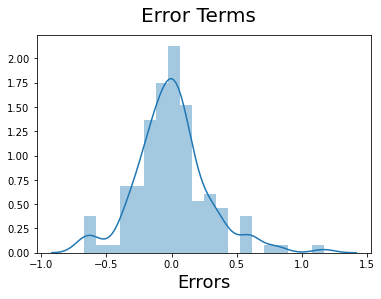

In [86]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Errors are normally distributed

# Now Making Prediction on Test dataset

In [87]:
#Scaling Test Dataset
df_test[num_var] = scaler.transform(df_test[num_var])

In [88]:
# Dividing into X_test and Y_test
y_test = df_test.pop('price')
X_test = df_test

In [89]:
X_test_new = X_test[X_train_new9.columns]

In [90]:
y_pred = lm.predict(X_test_new)

# Calculating the r2 score for test data

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9141744034620286

Text(0, 0.5, 'y_pred')

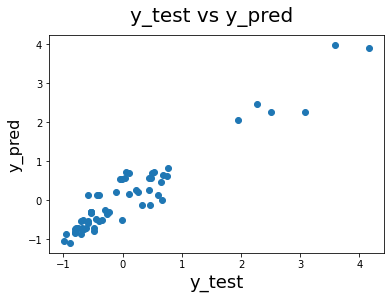

In [92]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

## So enginesize, aspiration, Car_Company_buick, Car_Company_bmw, Car_Company_porsche, cylindernumber_two, Car_Company_volvo, Car_Company_audi, Car_Company_mitsubishi, enginetype_l and Car_Company_saab are the best predictors.

### This means the companies Buick, BMW, Porsche, Volvo, Audi, Mitsubishi and Saab are the main competitors. Enginesize, aspiration, cylindernumber_two and enginetype-I are the most important features to set the car prices.